In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Load the data
df = pd.read_csv('energydata_complete.csv')

In [13]:
#Preview the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   

In [14]:
#To know the number of rows and columns
df.shape

(19735, 29)

In [15]:
#Check basic info and data types
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  fl

In [16]:
#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [17]:
#Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2

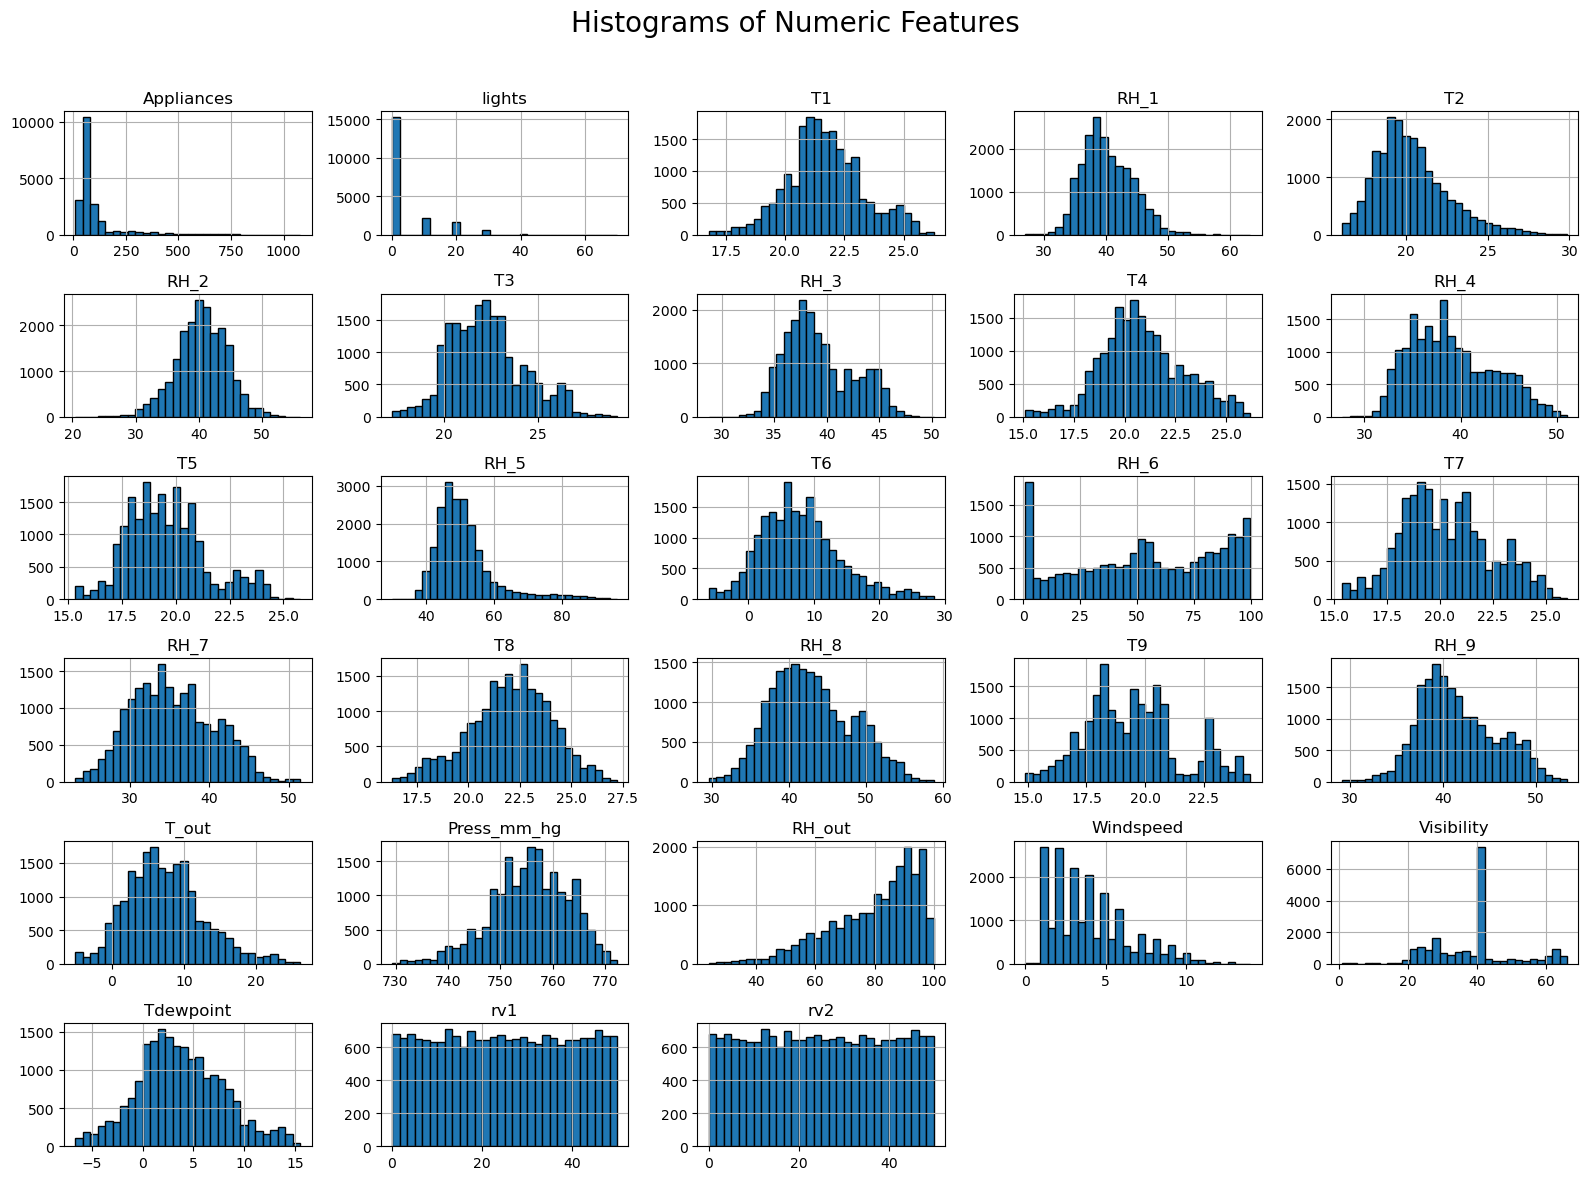

In [18]:
#Distribution of key features Histogram
numeric_columns = df.select_dtypes(include='number').columns

df[numeric_columns].hist(bins=30, figsize=(16, 12), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


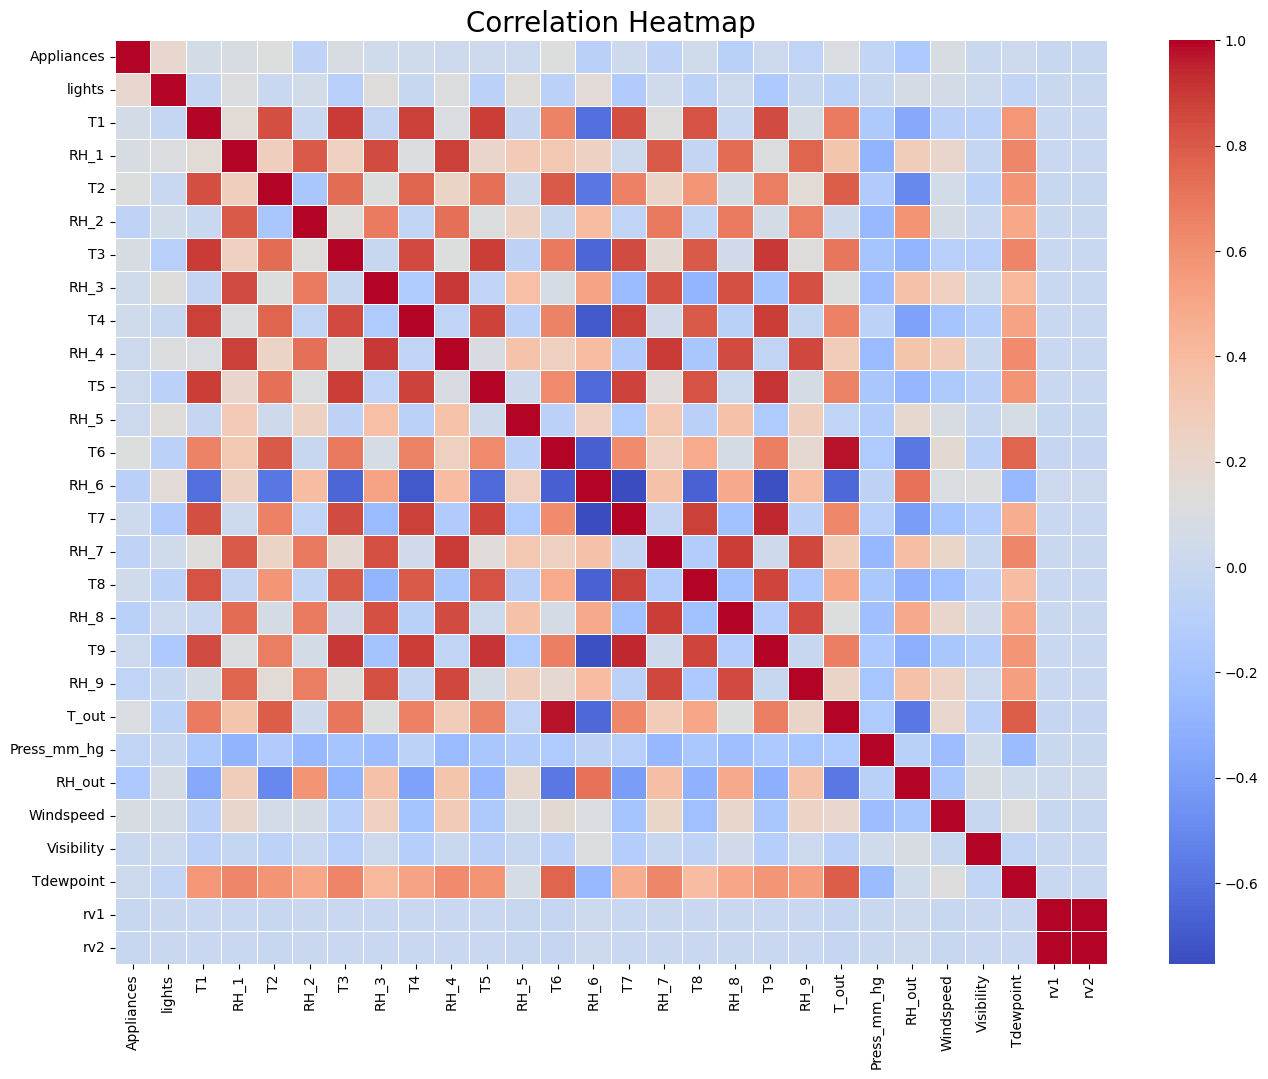

In [19]:
#Correlation heatmap

corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

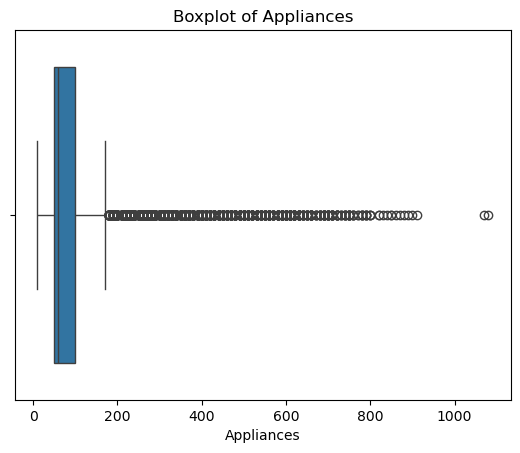

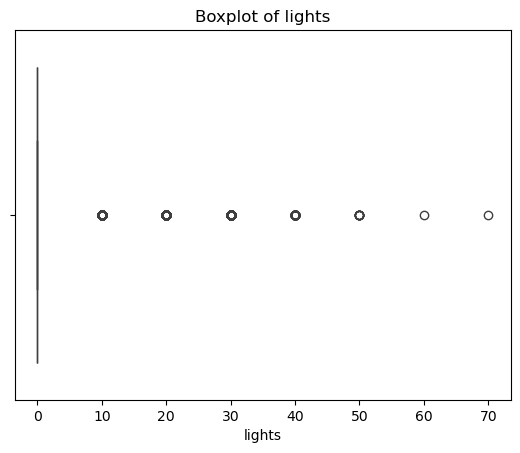

In [20]:
#Boxplots for outlier detection
for col in ['Appliances', 'lights']:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


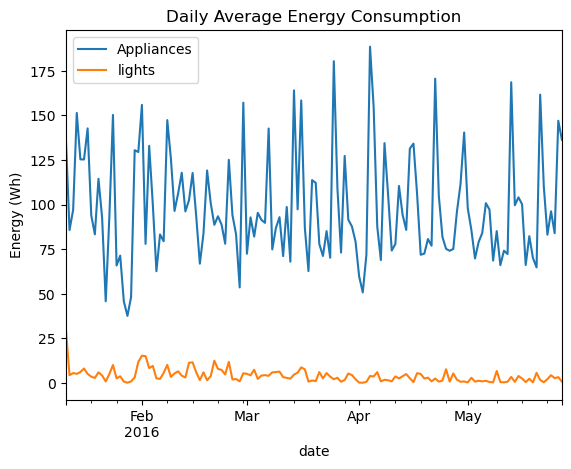

In [21]:

#If 'date' column exists, parse and check time series trend
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    
    df[['Appliances', 'lights']].resample('D').mean().plot()
    plt.title("Daily Average Energy Consumption")
    plt.ylabel("Energy (Wh)")
    plt.show()


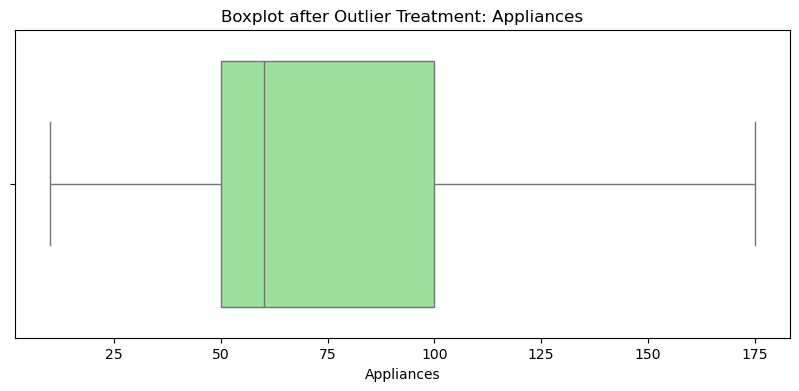

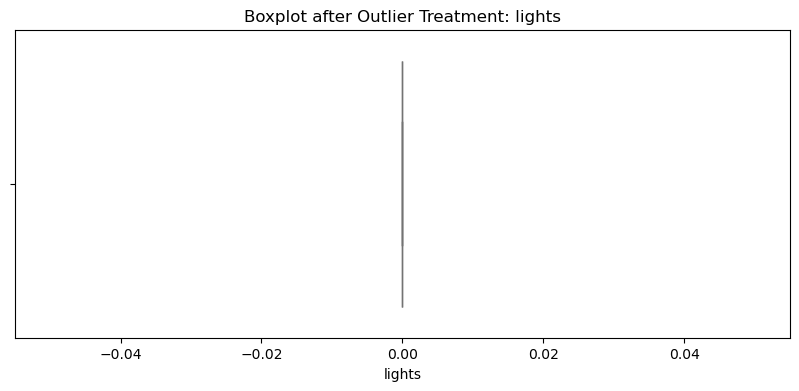

In [22]:


# Outlier treatment function using IQR capping
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower_bound, upper_bound)

# Apply to 'Appliances' and 'lights'
df['Appliances'] = cap_outliers(df['Appliances'])
df['lights'] = cap_outliers(df['lights'])

# Check again with boxplots
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Appliances', 'lights']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot after Outlier Treatment: {col}")
    plt.show()


=== Linear Regression ===
RMSE: 36.65
R² Score: 0.27


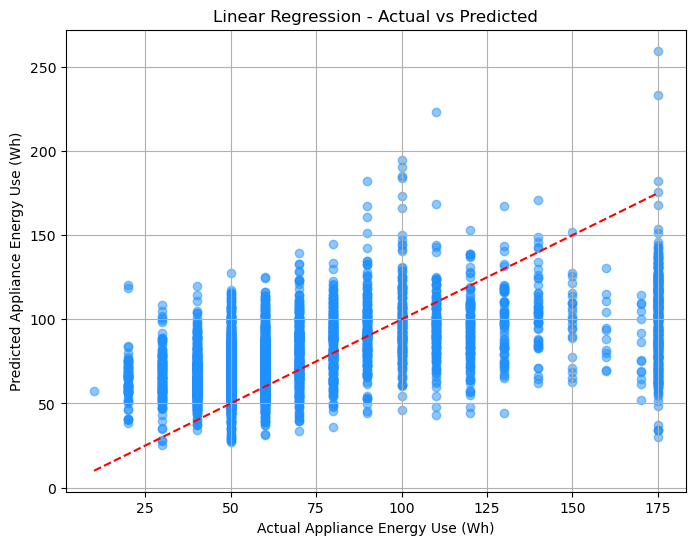

Accuracy: 0.64


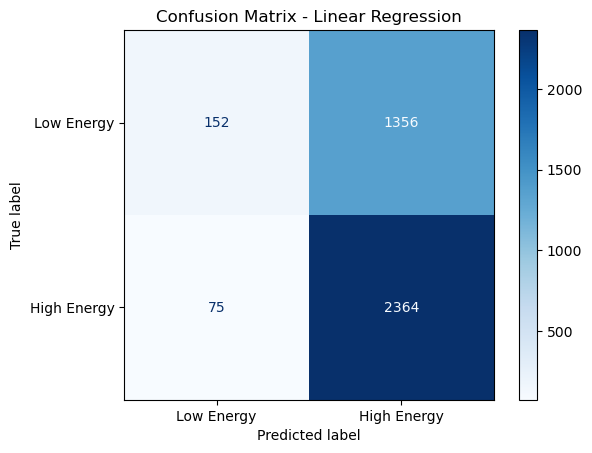

=== Linear Regression Classification Report ===
              precision    recall  f1-score   support

  Low Energy       0.67      0.10      0.18      1508
 High Energy       0.64      0.97      0.77      2439

    accuracy                           0.64      3947
   macro avg       0.65      0.54      0.47      3947
weighted avg       0.65      0.64      0.54      3947



In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
import numpy as np

# Train
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_lr = linear_model.predict(X_test)

# Regression Metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression ===")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Appliance Energy Use (Wh)')
plt.ylabel('Predicted Appliance Energy Use (Wh)')
plt.title('Linear Regression - Actual vs Predicted')
plt.grid(True)
plt.show()

# Classification
threshold = 50
y_test_class = (y_test > threshold).astype(int)
y_pred_lr_class = (y_pred_lr > threshold).astype(int)

acc_lr = accuracy_score(y_test_class, y_pred_lr_class)
cm_lr = confusion_matrix(y_test_class, y_pred_lr_class)

print(f"Accuracy: {acc_lr:.2f}")
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Low Energy", "High Energy"])
disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Linear Regression")
plt.show()

# Threshold-based classification
threshold = 50
y_test_class = (y_test > threshold).astype(int)
y_pred_lr_class = (y_pred_lr > threshold).astype(int)

# Classification Report
print("=== Linear Regression Classification Report ===")
print(classification_report(y_test_class, y_pred_lr_class, target_names=["Low Energy", "High Energy"]))


=== Random Forest ===
RMSE: 21.74
R² Score: 0.74


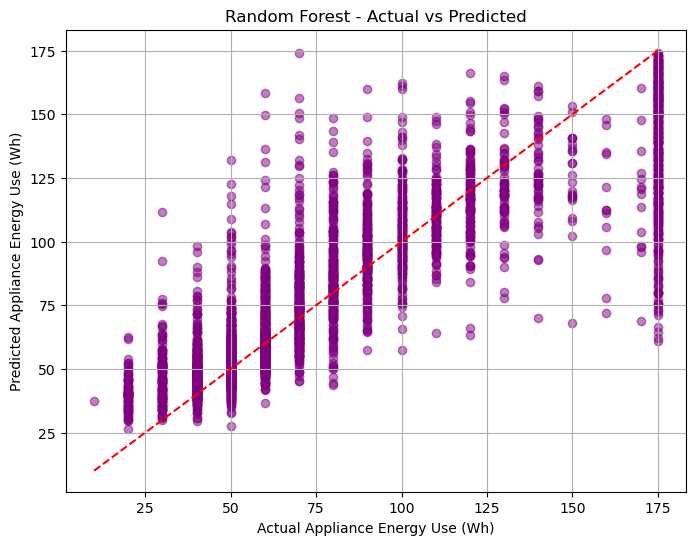

Accuracy: 0.77


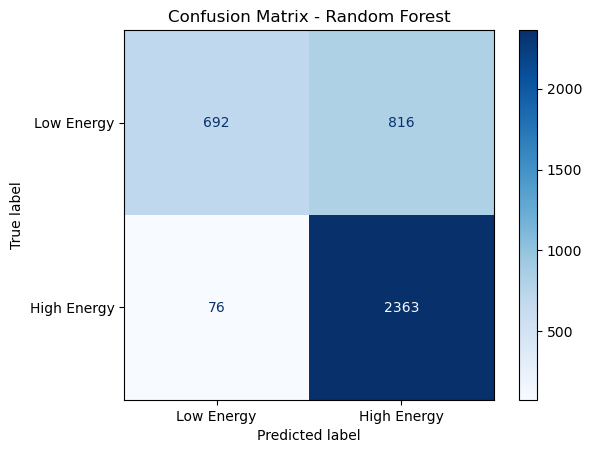

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

  Low Energy       0.90      0.46      0.61      1508
 High Energy       0.74      0.97      0.84      2439

    accuracy                           0.77      3947
   macro avg       0.82      0.71      0.72      3947
weighted avg       0.80      0.77      0.75      3947



In [91]:
from sklearn.ensemble import RandomForestRegressor

# Train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Regression Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("=== Random Forest ===")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Appliance Energy Use (Wh)')
plt.ylabel('Predicted Appliance Energy Use (Wh)')
plt.title('Random Forest - Actual vs Predicted')
plt.grid(True)
plt.show()

# Classification
y_pred_rf_class = (y_pred_rf > threshold).astype(int)

acc_rf = accuracy_score(y_test_class, y_pred_rf_class)
cm_rf = confusion_matrix(y_test_class, y_pred_rf_class)

print(f"Accuracy: {acc_rf:.2f}")
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Low Energy", "High Energy"])
disp_rf.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()
y_pred_rf_class = (y_pred_rf > threshold).astype(int)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test_class, y_pred_rf_class, target_names=["Low Energy", "High Energy"]))



=== Decision Tree ===
RMSE: 38.26
R² Score: 0.20


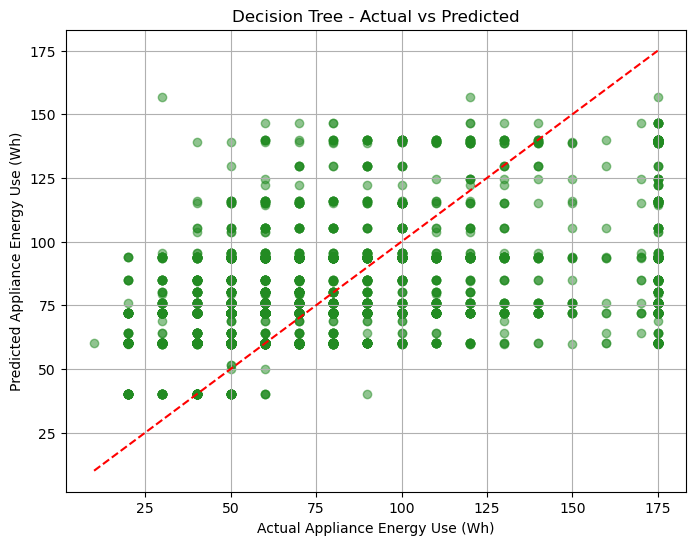

Classification Accuracy: 0.64


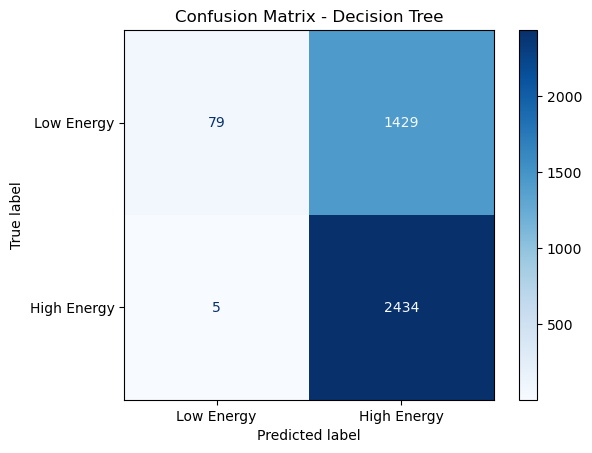

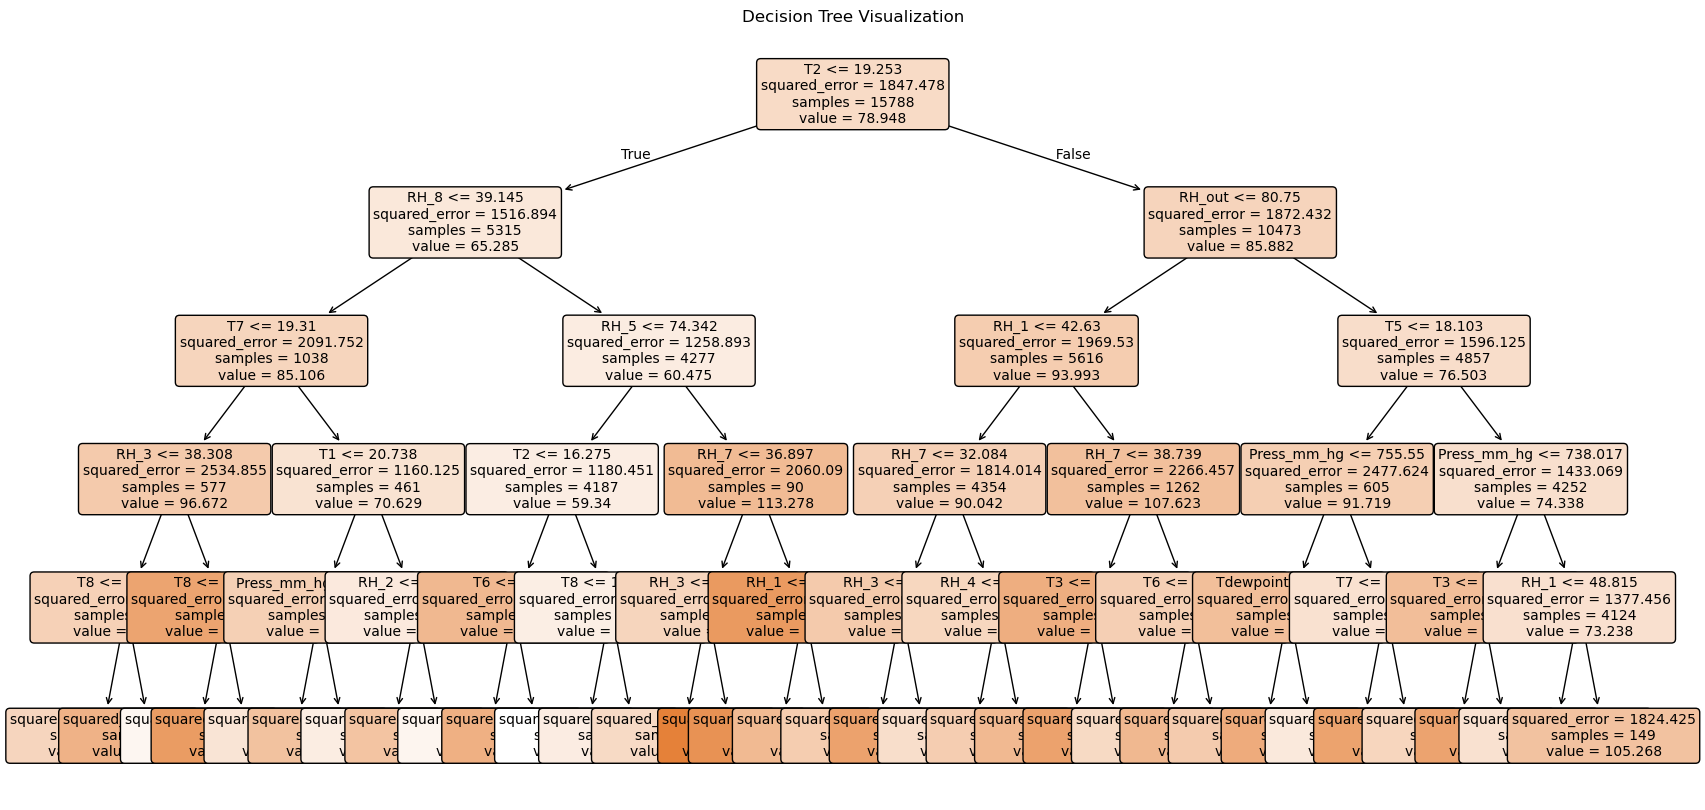

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

  Low Energy       0.94      0.05      0.10      1508
 High Energy       0.63      1.00      0.77      2439

    accuracy                           0.64      3947
   macro avg       0.79      0.53      0.44      3947
weighted avg       0.75      0.64      0.52      3947



In [93]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --- Train ---
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)  # you can adjust max_depth if needed
decision_tree_model.fit(X_train, y_train)

# --- Predict ---
y_pred_dt = decision_tree_model.predict(X_test)

# --- Regression Metrics ---
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("=== Decision Tree ===")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")

# --- Plot: Actual vs Predicted ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Appliance Energy Use (Wh)')
plt.ylabel('Predicted Appliance Energy Use (Wh)')
plt.title('Decision Tree - Actual vs Predicted')
plt.grid(True)
plt.show()

# --- Classification Metrics ---
threshold = 50
y_test_class = (y_test > threshold).astype(int)
y_pred_dt_class = (y_pred_dt > threshold).astype(int)

acc_dt = accuracy_score(y_test_class, y_pred_dt_class)
cm_dt = confusion_matrix(y_test_class, y_pred_dt_class)

print(f"Classification Accuracy: {acc_dt:.2f}")
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["Low Energy", "High Energy"])
disp_dt.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# --- Plot the Decision Tree ---
plt.figure(figsize=(20,10))
plot_tree(
    decision_tree_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

y_pred_dt_class = (y_pred_dt > threshold).astype(int)

print("=== Decision Tree Classification Report ===")
print(classification_report(y_test_class, y_pred_dt_class, target_names=["Low Energy", "High Energy"]))


=== KNN Regression ===
RMSE: 34.70
R² Score: 0.35


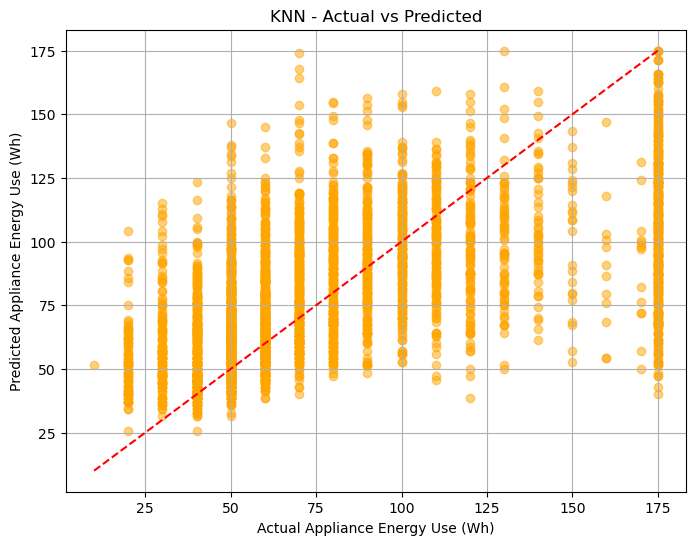

Accuracy: 0.72


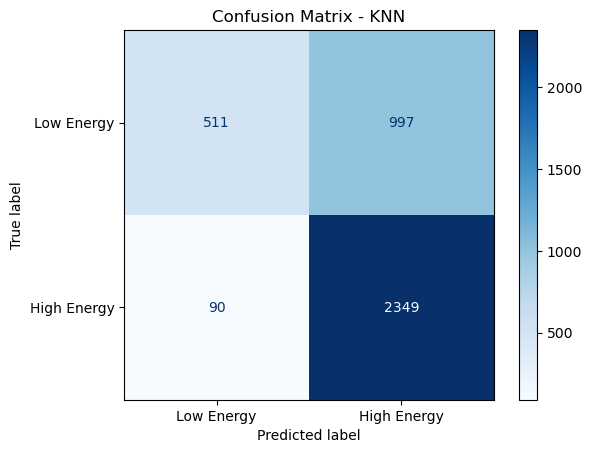

=== KNN Classification Report ===
              precision    recall  f1-score   support

  Low Energy       0.85      0.34      0.48      1508
 High Energy       0.70      0.96      0.81      2439

    accuracy                           0.72      3947
   macro avg       0.78      0.65      0.65      3947
weighted avg       0.76      0.72      0.69      3947



In [95]:
from sklearn.neighbors import KNeighborsRegressor

# Train
knn_model = KNeighborsRegressor(n_neighbors=7)  # You can change n_neighbors if needed
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Regression Metrics
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("=== KNN Regression ===")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R² Score: {r2_knn:.2f}")

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Appliance Energy Use (Wh)')
plt.ylabel('Predicted Appliance Energy Use (Wh)')
plt.title('KNN - Actual vs Predicted')
plt.grid(True)
plt.show()

# Classification
y_pred_knn_class = (y_pred_knn > threshold).astype(int)

acc_knn = accuracy_score(y_test_class, y_pred_knn_class)
cm_knn = confusion_matrix(y_test_class, y_pred_knn_class)

print(f"Accuracy: {acc_knn:.2f}")
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Low Energy", "High Energy"])
disp_knn.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()

y_pred_knn_class = (y_pred_knn > threshold).astype(int)

print("=== KNN Classification Report ===")
print(classification_report(y_test_class, y_pred_knn_class, target_names=["Low Energy", "High Energy"]))


=== SVR ===
RMSE: 41.43
R² Score: 0.07


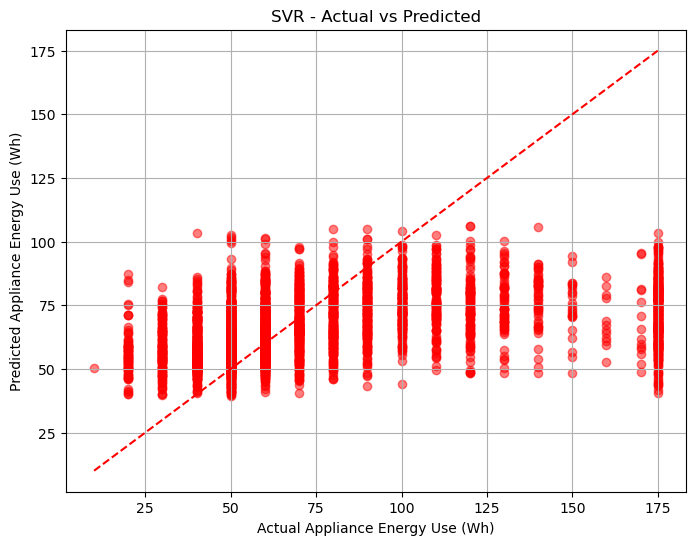

Accuracy: 0.64


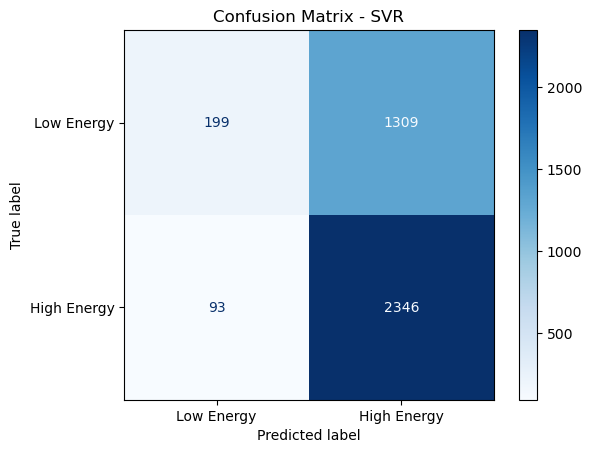

=== SVR (SVM Regression) Classification Report ===
              precision    recall  f1-score   support

  Low Energy       0.68      0.13      0.22      1508
 High Energy       0.64      0.96      0.77      2439

    accuracy                           0.64      3947
   macro avg       0.66      0.55      0.50      3947
weighted avg       0.66      0.64      0.56      3947



In [97]:
from sklearn.svm import SVR

# Train
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test)

# Regression Metrics
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print("=== SVR ===")
print(f"RMSE: {rmse_svr:.2f}")
print(f"R² Score: {r2_svr:.2f}")

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_svr, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Appliance Energy Use (Wh)')
plt.ylabel('Predicted Appliance Energy Use (Wh)')
plt.title('SVR - Actual vs Predicted')
plt.grid(True)
plt.show()

# Classification
y_pred_svr_class = (y_pred_svr > threshold).astype(int)

acc_svr = accuracy_score(y_test_class, y_pred_svr_class)
cm_svr = confusion_matrix(y_test_class, y_pred_svr_class)

print(f"Accuracy: {acc_svr:.2f}")
disp_svr = ConfusionMatrixDisplay(confusion_matrix=cm_svr, display_labels=["Low Energy", "High Energy"])
disp_svr.plot(cmap="Blues")
plt.title("Confusion Matrix - SVR")
plt.show()

y_pred_svr_class = (y_pred_svr > threshold).astype(int)

print("=== SVR (SVM Regression) Classification Report ===")
print(classification_report(y_test_class, y_pred_svr_class, target_names=["Low Energy", "High Energy"]))


In [ ]:
==REPORT==
After evalulating with different Machine Learning models such as Linear Regression,Random Forest,Decision Tree,KNN Regression,SVR 
based on the Classification Report ,RMSE and R² Score Random Forest with Highest Accuracy 0.77,Strong precision & recall balance,
Lowest RMSE 21.74,Highest R² Score 0.74 found to be the best suited for the above data analysis,
